<a href="https://colab.research.google.com/github/shayar/DM-Final-Project/blob/main/MJC_SS_Data_Mining_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Data Mining Final Project

by

Matthew Curran and

Shayar Shrestha

# Load Data

In [1]:
import pandas as pd

url = 'http://pluto.hood.edu/~dong/datasets/CBC_3200.csv'
DATA = pd.read_csv(url, header='infer')
DATA.head(1)

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,1712,14148,0,218,2,2,4,0,0,0,0,0,0,0,0,0,0,1


# Exploratory Data Analysis

In [5]:
# DATA.dtypes
# Result: all columns are of type int.

In [6]:
# Remove ID type columns:
df = DATA.copy(deep = True)
Seq = df['Seq#']
IDs = df['ID#']
df = df.drop(columns = ['Seq#', 'ID#'])
df.head(1)

,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,218,2,2,4,0,0,0,0,0,0,0,0,0,0,1


In [12]:
# Explore columns 'M' thru 'FirstPurch'.
# df['M'].value_counts()
# df['R'].value_counts()
df['F'].value_counts()
# df['FirstPurch'].value_counts()

# Conclusion: these three columns are not one-hot-encoded.

,count
F,
1,998
2,971
3,152
7,135
8,133
11,129
4,124
10,123
12,121


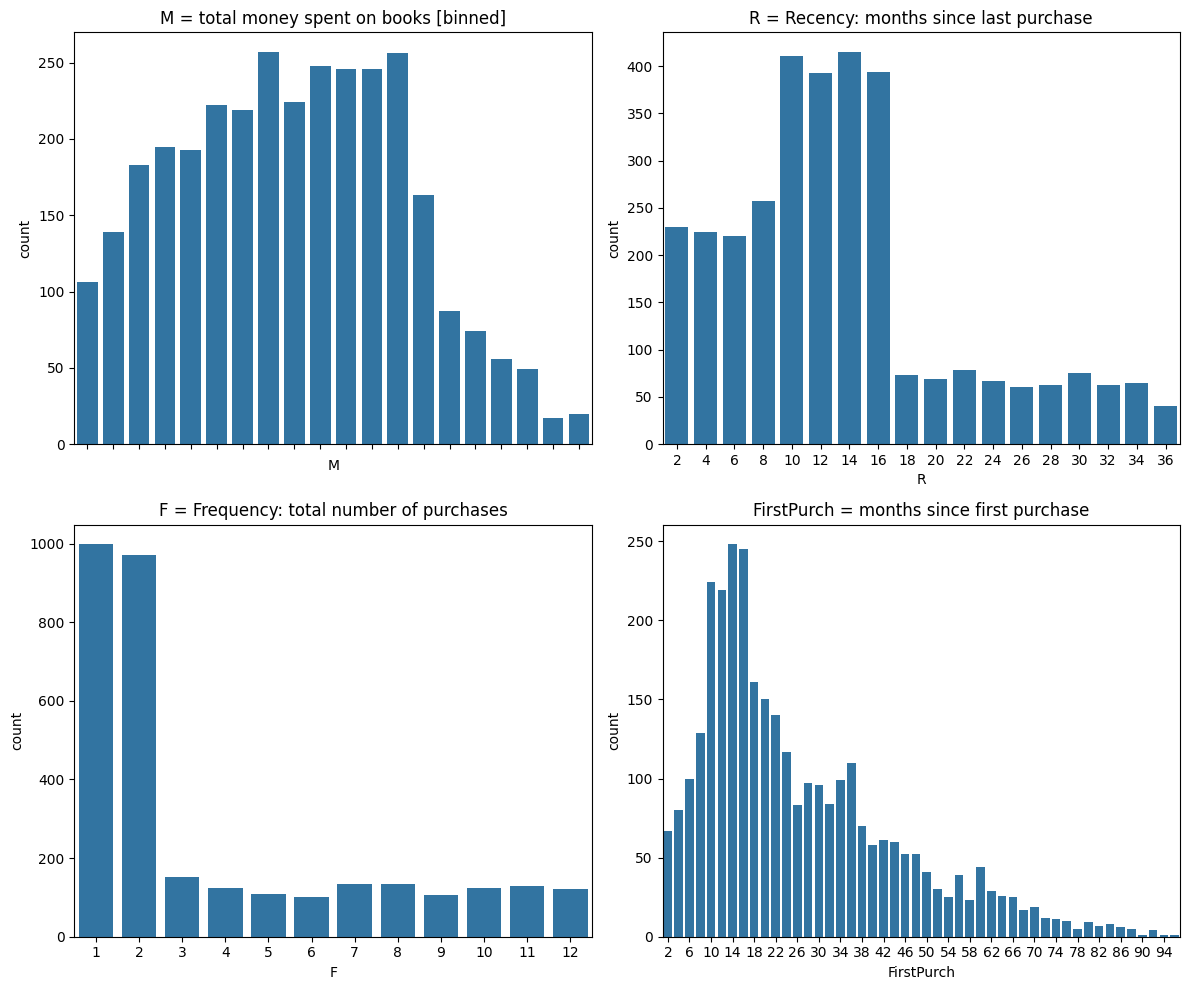

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

bin_edges = pd.cut(df['M'], bins=20)

sns.countplot(x=bin_edges, ax=axs[0, 0])
# sns.countplot(x='M', data=df, ax=axs[0, 0])
axs[0, 0].set_title('M = total money spent on books [binned]')
axs[0, 0].set_xticklabels([])

sns.countplot(x='R', data=df, ax=axs[0, 1])
axs[0, 1].set_title('R = Recency: months since last purchase')

sns.countplot(x='F', data=df, ax=axs[1, 0])
axs[1, 0].set_title('F = Frequency: total number of purchases')

sns.countplot(x='FirstPurch', data=df, ax=axs[1, 1])
axs[1, 1].set_title('FirstPurch = months since first purchase')
axs[1, 1].set_xticks(axs[1, 1].get_xticks()[::2])

plt.tight_layout()
plt.show()

These 4 columns all have interesting distributions. With the exception of 'FirstPurch', none of them looke much like any standard statistical distribution.

'R' and 'FirstPurch' are mostly telling us about the waxing/waning popularity of the store. The both seem to indicate a general decline in popularity starting about 10 months ago.

'FirstPurch' shows that the store peaked in popularity (in terms of new customers) during the period spanning roughly 10-22 months ago.


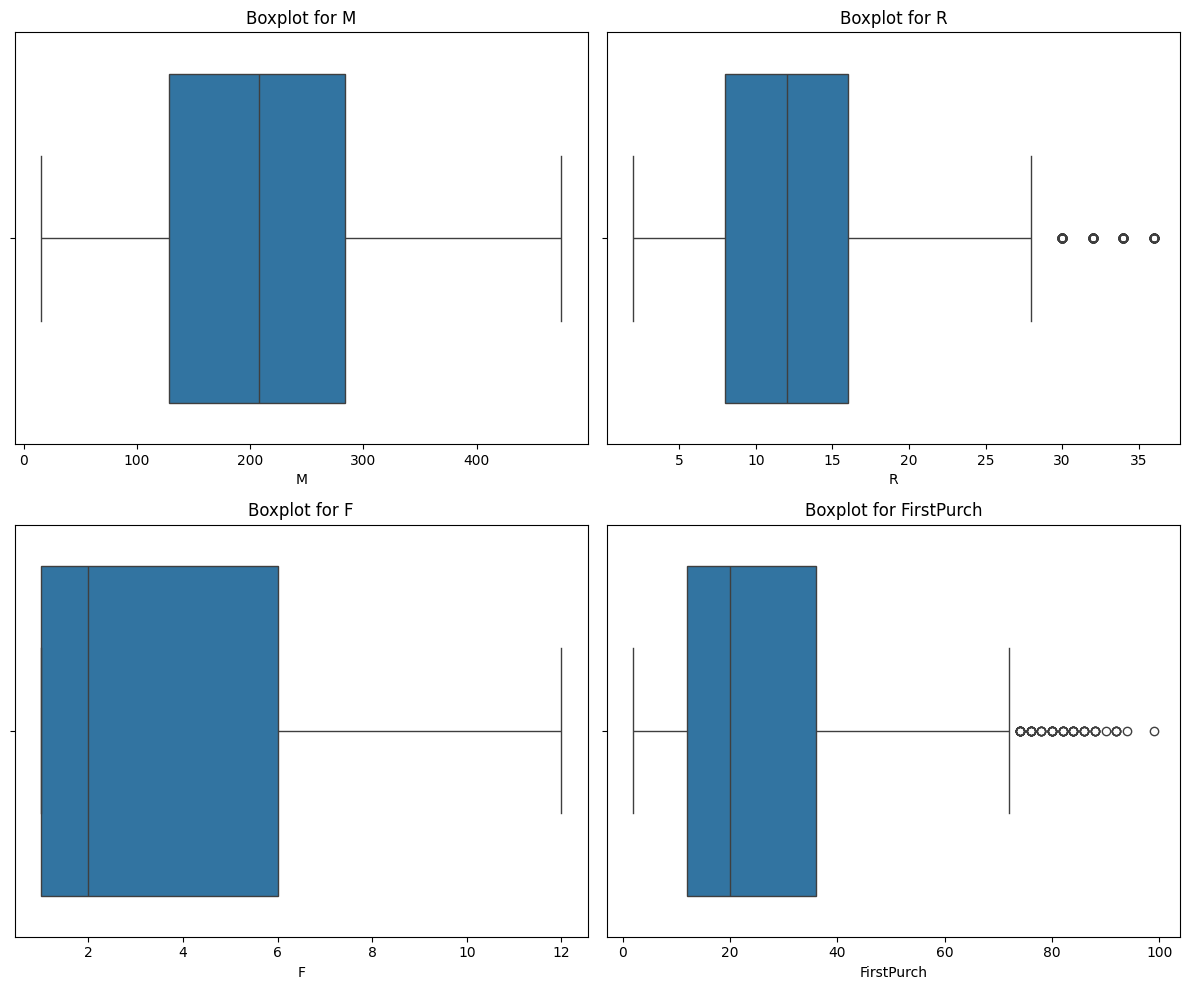

In [21]:
# Outliers.

# Box and whisker plots:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x=df['M'], ax=axs[0, 0])
axs[0, 0].set_title('Boxplot for M')

sns.boxplot(x=df['R'], ax=axs[0, 1])
axs[0, 1].set_title('Boxplot for R')

sns.boxplot(x=df['F'], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot for F')

sns.boxplot(x=df['FirstPurch'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot for FirstPurch')

plt.tight_layout()
plt.show()

These plots indicate no outliers for 'M' and 'F', and several outliers for 'R' and 'FirstPurch'. These outliers are simply customers from the earliest days.

One unusual thing we notice is that the earliest customers in 'FirstPurch' datae back to ~100 months ago, but the earliest customers in 'R' date back to only ~36 months ago.

In [30]:
# Print complete record (all columns) of the the customers with 'R' more than 35:
view_01 = df.query('R > 35')
view_02 = view_01.sort_values(by='FirstPurch', ascending=False)
view_02[:10]

# Observation: there are zero customers who bought their last book more than 36
#  months ago, even among the 10+ customers who bought their first book more
#  than 60 months ago.

# Conclusion: there is some gap or error in the record-keeping or
#  record-keeping system, such that any 'R' greater than 36 is
#  not properly recorded.
# The number of records with 'R' = 36 is not extra large, so its unlikely
#  that their 'R' was simply rounded down to 36.

,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
2865,1,281,36,11,92,3,0,2,1,1,1,3,0,0,0,0
573,1,271,36,8,82,1,1,4,0,1,0,0,0,0,0,0
1652,1,287,36,8,76,2,0,2,0,0,0,0,1,0,0,0
2591,0,399,36,7,74,0,0,2,1,1,0,0,0,0,0,0
3040,1,162,36,6,66,1,0,1,1,1,0,0,0,0,0,0
2408,0,374,36,11,66,3,1,2,1,2,0,2,0,0,0,0
2760,0,214,36,7,64,1,0,3,2,0,0,0,0,1,0,0
2856,0,75,36,5,64,1,0,2,0,0,0,1,0,0,0,0
2627,0,393,36,12,64,1,3,2,3,0,2,1,0,0,0,1
1214,0,368,36,5,62,1,2,1,0,1,0,2,0,0,0,0


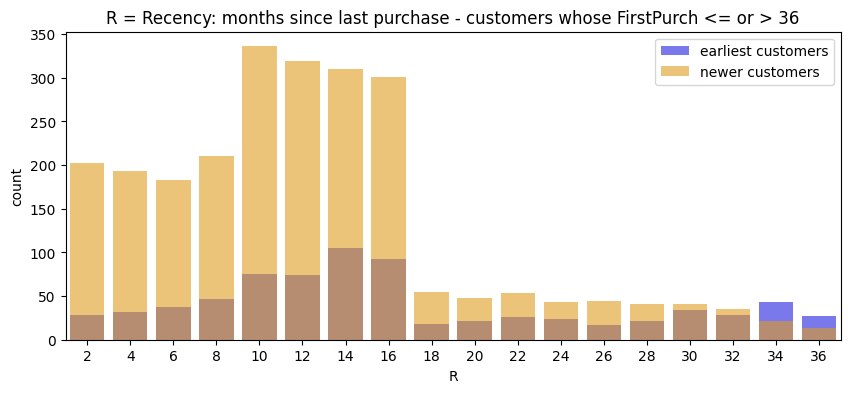

In [66]:
# Examine 'R' among early customers:
view_03 = df.query('FirstPurch > 36')
# view_04 = view_03.sort_values(by='R', ascending=True)
# view_04[:20]

view_05 = view_03['R'].value_counts()
view_05.sort_index(ascending=True)

view_06 = df.query('FirstPurch <= 36')

# Graph:
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

sns.countplot(x='R', data=view_03, ax=axs, color='blue', alpha=0.6, label='earliest customers')
sns.countplot(x='R', data=view_06, ax=axs, color='orange', alpha=0.6, label='newer customers')

axs.set_title('R = Recency: months since last purchase - customers whose FirstPurch <= or > 36')

plt.show()

It looks kind of similar to the data for newer customers, with a spike from 18 to 16. (Although it is not clear why it is not an exact match) it is possible that the R>36 data was missing, and was filled in by a data scientist, with the aim of somehow matching the distribution of known values.

If so, the values of R for FirstPurch>36 are all completely fictitious.

Hypothesis A: better results can be obtained by replacing R with -36, for all FirstPurch>36 (this way, a NN or Random Forest can easily learn to ignore R for those values).

In [65]:
df_clean = df.copy(deep=True)

my_mask = df_clean['FirstPurch'] > 36
df_clean.loc[my_mask, 'R'] = -36

view_07 = df_clean.query('FirstPurch > 36')
view_08 = view_07['R'].value_counts()
view_08.sort_index(ascending=True)

view_09 = view_07.sort_values(by='FirstPurch', ascending=False)
view_09[:5]

,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
2783,1,310,-36,12,99,2,2,2,2,0,0,4,0,0,0,0
1209,1,297,-36,12,94,1,0,7,1,2,1,0,0,0,0,0
2557,1,209,-36,10,92,4,0,3,0,1,0,1,0,0,0,0
2346,1,256,-36,11,92,1,2,5,1,0,0,0,0,0,0,0
858,1,171,-36,11,92,3,1,3,1,1,1,2,0,0,0,0


# Methods

# Conclusions

# References

# Print All

In [ ]:
# PRINT TO PDF
# do not include the output from installation.
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!pip install nbconvert

# Clear output:
from IPython.display import clear_output
clear_output()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!jupyter nbconvert  '/content/drive/MyDrive/Colab Notebooks/MJC_SS_Data_Mining_Final.ipynb' --to pdf